## Quiz 3.2.4) The hours of service until all light bulbs in a batch of 5000 fail

문제를 어떻게 해석하는지에 따라 서로 다른 두 가지의 풀이가 가능하다.

하나 하나의 전구를 수명이 될 때까지 순차적으로 작동시키는 경우(**Case1**)로 해석할 수도 있으며,

모든 전구를 한 번에 켜서 모든 전구가 수명이 다 될 때까지의 시간을 측정하는 경우(**Case2**)로 해석할 수도 있다.

### Case 1 : 전구를 순차적으로 작동시키는 경우

즉, 하나의 전구가 꺼지면 다른 전구를 켜고, 그게 꺼지면 또 다른 전구를 켜는 식으로 운영하는 경우이다. 

이 경우 각 전구의 수명을 $X_i (i \in \{1, \cdots, 5000\} )$라고 하면 이들은 _iid_이며 적당한 $\lambda$에 대해 $X_i \sim Exp(\lambda)$가 된다.

$\text{ }$

한편, **감마분포**의 성질상 $S_Y = \sum_{i=1}^{n} Y_i$, where $Y_i \sim Exp(\delta), iid$이면 $S_Y \sim Gamma(n, \frac{1}{\delta})$이고,

감마분포를 따르는 $Z \sim Gamma(\alpha, \beta)$는 $\mathbb{E}(Z)=\alpha\beta$, $Var(Z)=\alpha\beta^2$이다.

$\text{ }$

따라서 전구의 수명들의 합, 즉 지수분포들의 합인 전체 운영시간 $S = \sum X_i$은 $Gamma(5000, \frac{1}{\lambda})$를 따르고, $\mathbb{E}(S)=\frac{5000}{\lambda}$, $Var(S)=\frac{5000}{\lambda^2}$이다.

$\text{ }$

하지만 $n=5000$은 충분히 크므로 확률변수의 합인 $S$는 정규분포를 따른다고 볼 수 있으며, $S \sim N(\frac{5000}{\lambda}, \frac{5000}{\lambda^2})$로 근사할 수 있다.

다음은 $\lambda=1000$일 때 샘플링을 통해 그린 그림이다.

In [1]:
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

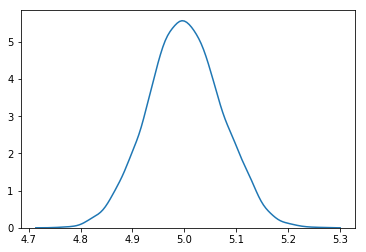

In [2]:
sample = np.array([])

for i in range(10000): # iteration
    sample = np.append(sample, sum(np.random.exponential(scale=1/1000, size=5000)))

sns.kdeplot(sample)

### Case 2 : 모든 전구가 수명이 다 될 때까지의 시간

이 경우도 각 전구의 수명은 $X_i \sim Exp(\lambda)$ ($X_i (i \in \{1, \cdots, 5000\} ), iid$로 놓으면

구하고자 하는 시간 $T$는 $T=max\{X_i : i=1, \cdots, 5000\}$이 된다.

$\text{ }$

[위키피디아](https://en.wikipedia.org/wiki/Exponential_distribution#Distribution_of_the_minimum_of_exponential_random_variables)에 따르면 지수분포의 최솟값으로 정의된 무선변수는 $\sum \lambda$의 파라미터를 갖는 지수분포를 따르지만, 최댓값의 경우는 따르지 않는다.

그러면 PDF를 어떻게 나타낼 수 있을까? 일단 $Exp(\lambda)$의 PDF를 $f_X$로 나타내고, $T$의 CDF, PDF를 $F_T$, $f_T$로 나타내자.

$\text{ }$

$$
\begin{aligned}
F_T(t) &= P(T \le t) \\
&= P(X_1 \le t) \cdots P(X_{5000} \le t) \\
&= \int_0^{t} f_X(x) dx \cdots \int_0^{t} f_X(x) \\
&= \prod_{i=1}^{5000} (1-e^{-\lambda t}) \\
\end{aligned}
$$

$$
\begin{aligned}
f_T(t) &= \frac{d}{dt} \prod_{i=1}^{5000} (1-e^{-\lambda t}) \\
&= 5000 (1-e^{-\lambda t}) ^ {4999} \lambda e ^ {-\lambda t} \\
\end{aligned}
$$

$\text{ }$

이 분포의 기댓값은 $\lambda(1 + \frac{1}{2} + \cdots + \frac{1}{n}) \approx \cdot \lambda ln(n)$이 된다.